In [1]:
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = pgv.AGraph()

In [3]:
node_list = [i for i in range(400)]

In [4]:
G.add_nodes_from(node_list)

In [7]:
#G.node_attr["shape"] = "circle"
#G.edge_attr["color"] = "red"

In [34]:


#ajoute les noeuds
import random
p = 0.8
q = 0.01

    
def tirage(p,q):
    G = pgv.AGraph()
    G = nx.Graph()
    node_list = [i for i in range(400)]
    G.add_nodes_from(node_list)
    dicoNeigh = {}
    for j in range(400):
        for k in range(j+1,400):
            if k-j<100:
                #tirage dans le même groupe
                tirage = random.random()
                if tirage <= p:
                    G.add_edge(j, k, color ="blue")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
            else : 
                #tirage pour groupes différents
                tirage = random.random()
                if tirage <= q:
                    G.add_edge(j, k, color ="red")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
    return dicoNeigh, G
   
dicoNeigh, G = tirage(p,q)


In [27]:
#compute dicoNeigh for other graphs
import re
def getDicoNeigh(fileName):
    f = open(fileName, "r")
    dicoNeigh = {}
    for x in f:
        sep = re.split('\s+', x)
        if sep[0].isdigit():
            a = int(sep[0])
            b = int(sep[1])
            if a in dicoNeigh :
                dicoNeigh[a].add(b)
            else :
                dicoNeigh[a]={b}
            if b in dicoNeigh:
                dicoNeigh[b].add(a)
            else:
                dicoNeigh[b]={a}
    return dicoNeigh


In [6]:
#Fisher Yates shuffle
def FisherYatesShuffle (listeToShuffle, nbNodes): 
    for i in range(nbNodes-1,0,-1): 
        j = random.randint(0,i) 
        listeToShuffle[j], listeToShuffle[i] = listeToShuffle[i], listeToShuffle[j] 
    return listeToShuffle

In [35]:
#dicoNeigh = {1:{2,3,4}, 2:{1,3}, 3:{1,2}, 4:{1,5,6}, 5:{4,6}, 6:{4,5}}
from collections import defaultdict

def labelPropagation(dicoNeigh):
    nbNodes = max(dicoNeigh.keys())+1 #ajout artificiel drun zéro au cas où le noeud 0 est présent
    label = []
    #attribution d'un label unique pour chaque noeud si le noeud est relié au graphe
    for i in range(0, nbNodes):
        if i in dicoNeigh:
            label.append(i)
        else:
            #noeud non relié au graphe
            label.append(-1)
    continueIteration = True
    nbIter = 0
    while continueIteration:
        nbChange = 0
        listToShuffle = [i for i in range(nbNodes)]
        listShuffle = FisherYatesShuffle(listToShuffle, nbNodes)
        for node in listShuffle:
            if node in dicoNeigh:
                neighbours = dicoNeigh[node]
                dicoLabel = {}
                for neigh in neighbours:
                    if label[neigh] in dicoLabel:
                        dicoLabel[label[neigh]]+=1
                    else : 
                        dicoLabel[label[neigh]]=1
                dicoLabel_inverted = defaultdict(list)
                {dicoLabel_inverted[v].append(k) for k, v in dicoLabel.items()}
                dicoInverted = dict(dicoLabel_inverted)
                maxKey = max(dicoInverted.keys())
                #maxNumber = max(dicoLabel.values())
                #setLabelMax = set()
                #for key in dicoLabel.keys():
                #    if dicoLabel[key]==maxNumber:
                #        setLabelMax.add(key)
                #regarde si label déjà présent
                if label[node] not in dicoInverted[maxKey]:
                    #label[node] = setLabelMax.pop()
                    label[node] = random.choice(dicoInverted[maxKey])
                    nbChange +=1

        if nbChange == 0:
            continueIteration = False
        nbIter +=1
        
    return label  

dicoNeigh = getDicoNeigh('com-amazon.ungraph.txt')
import time
tps1 = time.clock()

label = labelPropagation(dicoNeigh)
tps2 = time.clock()
print(tps2 - tps1)


/Users/opheliebleu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


0.33356199999980163


/Users/opheliebleu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [33]:
fichier = open("testLabel.txt", "a")
for lab in label:
    fichier.write(str(lab)+'\n')
fichier.close()

In [36]:
print(len(label))
print(len(list(set(label))))

400
2


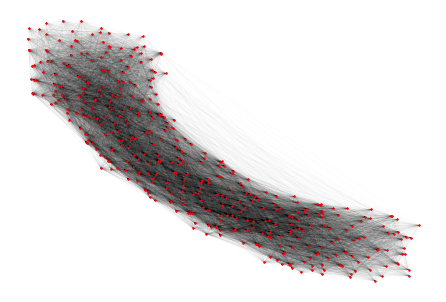

In [9]:
pos = nx.spring_layout(G)
options = {
    "node_color": "blue",
    "node_size": 2,
    "linewidths": 0,
    "width": 0.01,
}
nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos,  node_size=2, node_color="r")
plt.show()

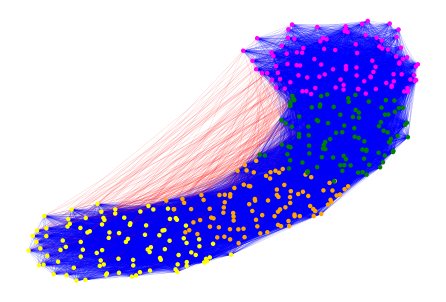

In [12]:
import networkx as nx

def colorNode(number):
    if number < 100:
        return 'yellow'
    elif number < 200:
        return 'orange'
    elif number < 300:
        return 'green'
    else : 
        return 'magenta'

options = {
    #"node_color": "black",
    "node_size": 20,
    "linewidths": 0,
    "width": 0.08,
}
edges = G.edges()
colorNodes = [colorNode(i) for i in range(400)]
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

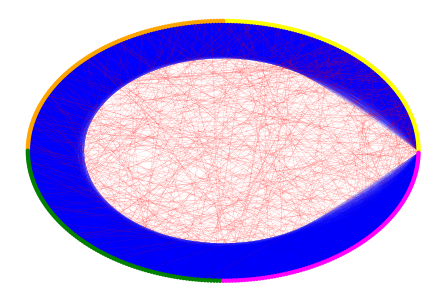

In [13]:
nx.draw_circular(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

/Users/opheliebleu/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/opheliebleu/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


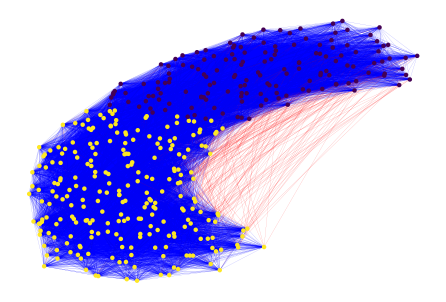

In [37]:
import networkx as nx

def colorNode(number):
    if number < 100:
        return 'yellow'
    elif number < 200:
        return 'orange'
    elif number < 300:
        return 'green'
    else : 
        return 'magenta'

options = {
    #"node_color": "black",
    "node_size": 20,
    "linewidths": 0,
    "width": 0.08,
}
edges = G.edges()
colorNodes = [label[i] for i in range(400)]
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

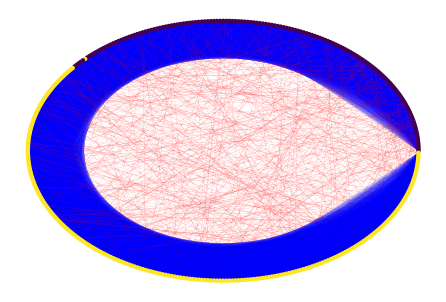

In [38]:
nx.draw_circular(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)